## Randall Mencias
## Juan Francisco Cisneros
## Josue Cardenas

### DESCRIPCION DEL PROYECTO
- ....

#### Librerias

In [242]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

### ANALISIS EXPLORATORIO DE DATOS

In [243]:
# Where data is stored
pathTest = "../resources/clean_data/test_clean.csv"
pathTrain = "../resources/clean_data/train_clean.csv"

# Read data
dfTest = pd.read_csv(pathTest)
dfTrain = pd.read_csv(pathTrain)

# Size of the train and test data
print("Train data size: ", dfTrain.shape)
print("Test data size: ", dfTest.shape)

Train data size:  (161297, 7)
Test data size:  (53200, 7)


In [244]:
dfTrain.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2003-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [245]:
dfTest.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,53641,Alesse,Abnormal Uterine Bleeding,"""I&#039;ve been using Alesse 28 for a little o...",10,22-Jan-14,8
1,195548,Aviane,Abnormal Uterine Bleeding,"""I have been on Aviane for almost three months...",10,2001-Mar-12,6
2,195659,Aviane,Abnormal Uterine Bleeding,"""My doctor put me on Aviane to suppress my per...",9,16-Aug-11,9
3,195622,Aviane,Abnormal Uterine Bleeding,"""It&#039;s only been a month so I can&#039;t g...",8,10-Sep-12,4
4,147702,Aviane,Abnormal Uterine Bleeding,"""I have been on Aviane for about a year and a ...",9,13-Mar-10,4


#### Plot Columns

In [246]:
print("Test data shape, Rows and Columns: ", dfTest.shape)
print("Train data shape, Rows and Columns: ", dfTrain.shape)
print()
print("Test data columns: ", dfTest.columns)
print("Train data columns: ", dfTrain.columns)

Test data shape, Rows and Columns:  (53200, 7)
Train data shape, Rows and Columns:  (161297, 7)

Test data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Train data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [247]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [248]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53200 entries, 0 to 53199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53200 non-null  int64 
 1   drugName     53200 non-null  object
 2   condition    53200 non-null  object
 3   review       53200 non-null  object
 4   rating       53200 non-null  int64 
 5   date         53200 non-null  object
 6   usefulCount  53200 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.8+ MB


In [249]:
dfTrain.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [250]:
# Check for missing values
dfTrain.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [251]:
# Drop all rows with missing values
dfTrain.dropna(inplace=True)
dfTrain.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [252]:
dfTest.describe()

,uniqueID,rating,usefulCount
count,53200.000000,53200.000000,53200.000000
mean,116465.986485,6.978289,28.170282
std,67001.804385,3.286389,36.284596
min,0.000000,1.000000,0.000000
25%,58371.500000,4.000000,6.000000
50%,116418.500000,8.000000,16.000000
75%,174645.250000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [253]:
# Check for missing values
dfTest.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [254]:
print("Test data shape, Rows and Columns: ", dfTest.shape)
print("Train data shape, Rows and Columns: ", dfTrain.shape)

Test data shape, Rows and Columns:  (53200, 7)
Train data shape, Rows and Columns:  (160398, 7)


In [255]:
dfAll = pd.concat([dfTrain,dfTest])


Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

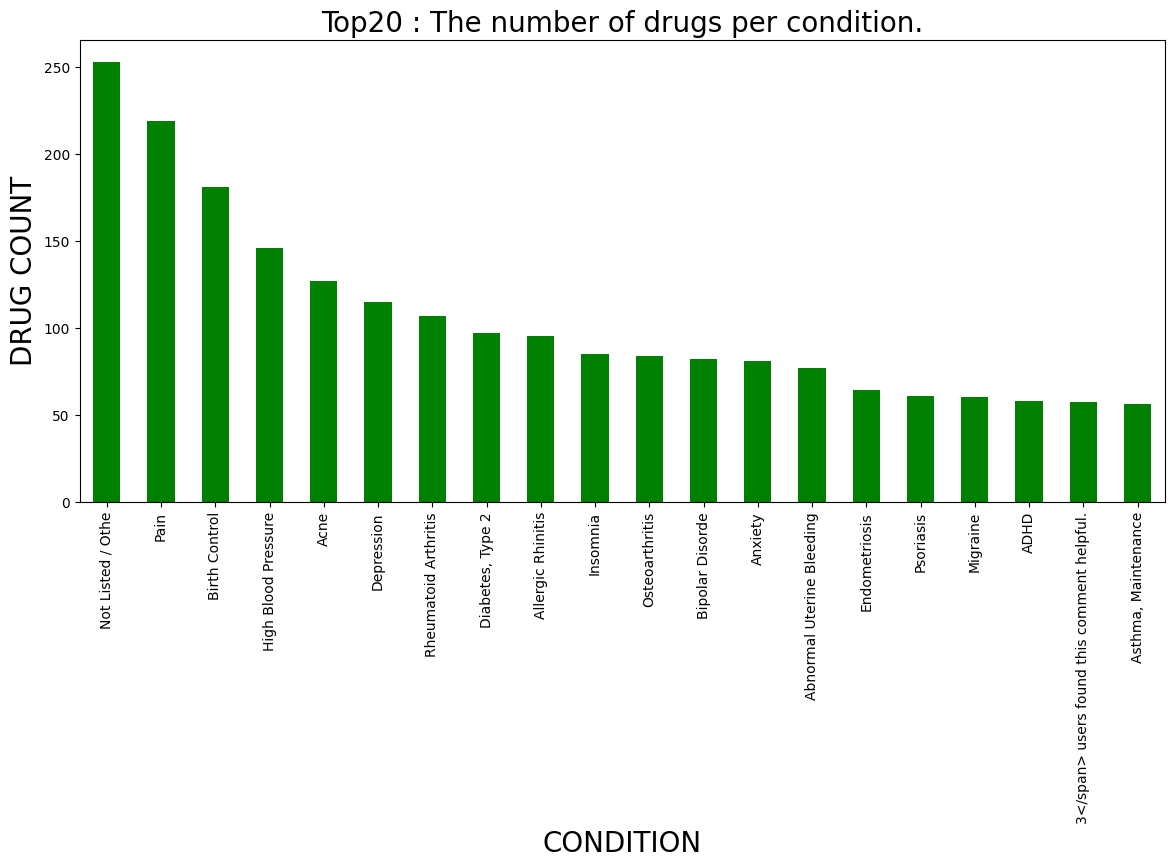

In [256]:
condition_dn = dfAll.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("CONDITION", fontsize = 20)
plt.ylabel("DRUG COUNT", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

Text(0.5, 1.0, 'The number of ratings per rating.')

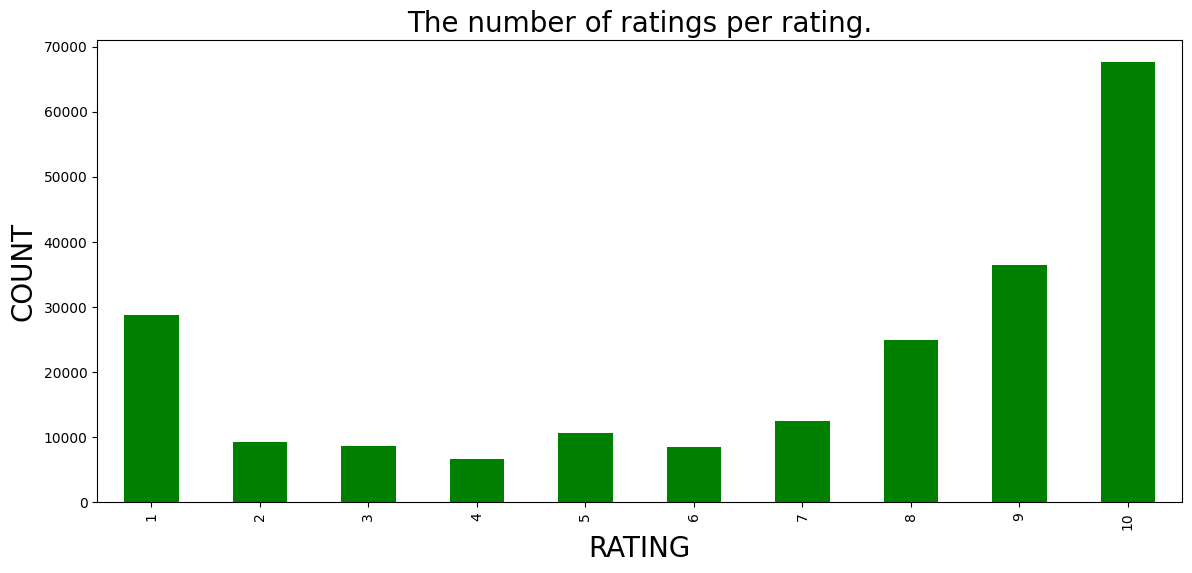

In [257]:
ratings = dfAll.groupby(['rating'])['rating'].count()
ratings.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("RATING", fontsize = 20)
plt.ylabel("COUNT", fontsize = 20)
plt.title("The number of ratings per rating.", fontsize = 20)

#### Label Encoding

In [258]:
# Label encoding for the condition
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfAll['condition'] = le.fit_transform(dfAll['condition'])
dfAll

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,473,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,73,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,168,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,168,"""This is my first time using any form of birth...",8,2003-Nov-15,10
4,35696,Buprenorphine / naloxone,586,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53195,164454,Diclofenac,908,"""The medication has been somewhat helpful with...",5,24-Dec-14,22
53196,87420,Naproxen,908,"""Prescribed 500 mg for pain in right shoulder ...",1,24-Jun-17,2
53197,111788,Relafen,908,"""Very helpful for my frozen shoulder pain with...",9,12-Nov-11,38
53198,18328,Voltaren,908,"""The medication has been somewhat helpful with...",5,24-Dec-14,22


In [259]:
# Label encoding for the drugName
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfAll['drugName'] = le.fit_transform(dfAll['drugName'])
dfAll

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,3420,473,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,1535,73,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,1982,168,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,2445,168,"""This is my first time using any form of birth...",8,2003-Nov-15,10
4,35696,553,586,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53195,164454,1007,908,"""The medication has been somewhat helpful with...",5,24-Dec-14,22
53196,87420,2252,908,"""Prescribed 500 mg for pain in right shoulder ...",1,24-Jun-17,2
53197,111788,2832,908,"""Very helpful for my frozen shoulder pain with...",9,12-Nov-11,38
53198,18328,3512,908,"""The medication has been somewhat helpful with...",5,24-Dec-14,22


#### Dates Format

In [260]:
dfAll['date'] = pd.to_datetime(dfAll['date'])

##### The date will have more importance if is near to 2023

In [261]:
dfAll['year'] = dfAll['date'].dt.year
# Get the minimum year and maximum year
print("Minimum year: ", dfAll['year'].min())
print("Maximum year: ", dfAll['year'].max())

Minimum year:  2001
Maximum year:  2017


In [262]:
# Knowing that the maximum year is 2017 and minimum is 2001, then give a rate from 0 to 1
# For each year
dfAll['year_importance'] = (dfAll['year'] - 2001) / (2017 - 2001)
dfAll

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,year_importance
0,206461,3420,473,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,0.6875
1,95260,1535,73,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,0.5625
2,92703,1982,168,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,0.5000
3,138000,2445,168,"""This is my first time using any form of birth...",8,2003-11-15,10,2003,0.1250
4,35696,553,586,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,0.9375
...,...,...,...,...,...,...,...,...,...
53195,164454,1007,908,"""The medication has been somewhat helpful with...",5,2014-12-24,22,2014,0.8125
53196,87420,2252,908,"""Prescribed 500 mg for pain in right shoulder ...",1,2017-06-24,2,2017,1.0000
53197,111788,2832,908,"""Very helpful for my frozen shoulder pain with...",9,2011-11-12,38,2011,0.6250
53198,18328,3512,908,"""The medication has been somewhat helpful with...",5,2014-12-24,22,2014,0.8125


#### Reviews

- WE NEED TO MAKE A SENTIMENT ANALYSIS OF THE REVIEWS
- SOME WORDS ARE NOT USEFUL FOR THE ANALYSIS, WE NEED TO CLEAN THE DATA
- OTHER WORDS ARE USEFUL FOR THE ANALYSIS, WE NEED TO KEEP THE DATA

In [263]:
# take a look at five reviews 
dfAll['review']

0        "It has no side effect, I take it in combinati...
1        "My son is halfway through his fourth week of ...
2        "I used to take another oral contraceptive, wh...
3        "This is my first time using any form of birth...
4        "Suboxone has completely turned my life around...
                               ...                        
53195    "The medication has been somewhat helpful with...
53196    "Prescribed 500 mg for pain in right shoulder ...
53197    "Very helpful for my frozen shoulder pain with...
53198    "The medication has been somewhat helpful with...
53199    "I have a hiatal hernia which can cause bad re...
Name: review, Length: 213598, dtype: object

##### Lets delete special characters

In [264]:
stops = set(stopwords.words('english'))

In [265]:
# Take in consideration this words
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [266]:
stemmer = SnowballStemmer('english')

# Delete special characters and stopwords
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [267]:
dfAll['review_clean'] = dfAll['review'].apply(review_to_words)

In [268]:
dfAll['review_clean']

0            no side effect take combin bystol mg fish oil
1        son halfway fourth week intuniv becam concern ...
2        use take anoth oral contracept pill cycl happi...
3        first time use form birth control glad went pa...
4        suboxon complet turn life around feel healthie...
                               ...                        
53195    medic somewhat help stiff pain still present s...
53196    prescrib mg pain right shoulder collar bone pa...
53197             help frozen shoulder pain no side effect
53198    medic somewhat help stiff pain still present s...
53199    hiatal hernia caus bad reflux etc take prilose...
Name: review_clean, Length: 213598, dtype: object

#### Sentiment Analysis
- WE NEED TO MAKE A SENTIMENT ANALYSIS OF THE REVIEWS, TO ATTACK THE PROBLEM WE NEED TO KNOW IF THE REVIEW IS POSITIVE, NEUTRAL OR NEGATIVE
- AFTER A RESEARCH WE FOUND THAT THIS IS A GREAT WAY TO USE THE REVIEWS FURTHER IN THE ANALYSIS AND MODEL TRAINING

##### Making a Sentiment using each review rating
- WE ENCOUNTERD THAT IT IS BEST TO USE A PRE TRAINED MODEL TO MAKE THE SENTIMENT ANALYSIS

In [269]:
# Make a rating if the rating is greater than 6.66 is positive, if the rating is less than 3.33 is negative, otherwise is neutral
dfAll['sentiment'] = dfAll['rating'].apply(lambda x: 1 if x > 6.66 else -1 if x < 3.33 else 0)
dfAll

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,year_importance,review_clean,sentiment
0,206461,3420,473,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,0.6875,no side effect take combin bystol mg fish oil,1
1,95260,1535,73,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,0.5625,son halfway fourth week intuniv becam concern ...,1
2,92703,1982,168,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,0.5000,use take anoth oral contracept pill cycl happi...,0
3,138000,2445,168,"""This is my first time using any form of birth...",8,2003-11-15,10,2003,0.1250,first time use form birth control glad went pa...,1
4,35696,553,586,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,0.9375,suboxon complet turn life around feel healthie...,1
...,...,...,...,...,...,...,...,...,...,...,...
53195,164454,1007,908,"""The medication has been somewhat helpful with...",5,2014-12-24,22,2014,0.8125,medic somewhat help stiff pain still present s...,0
53196,87420,2252,908,"""Prescribed 500 mg for pain in right shoulder ...",1,2017-06-24,2,2017,1.0000,prescrib mg pain right shoulder collar bone pa...,-1
53197,111788,2832,908,"""Very helpful for my frozen shoulder pain with...",9,2011-11-12,38,2011,0.6250,help frozen shoulder pain no side effect,1
53198,18328,3512,908,"""The medication has been somewhat helpful with...",5,2014-12-24,22,2014,0.8125,medic somewhat help stiff pain still present s...,0


In [270]:
df_train, df_test = train_test_split(dfAll, test_size=0.33, random_state=42) 

In [271]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(4, 4),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(4, 4))

In [272]:
pipeline = Pipeline([
    ('vect', vectorizer),
])

#### All Reviews to Numerical Values

In [273]:
train_data_features = pipeline.fit_transform(df_train['review_clean'])

In [274]:
# Show the matrix
train_data_features


<143110x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 169493 stored elements in Compressed Sparse Row format>

In [275]:
test_data_features = pipeline.fit_transform(df_test['review_clean'])

In [276]:
# Show the matrix
test_data_features

<70488x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 93828 stored elements in Compressed Sparse Row format>

#### Train a Model that uses the reviews to predict the condition